## Machine Learning in Business:

### Project description: 
For the OilyGiant mining company. 
The task is to find the best place for a new well.
Steps to choose the location:
* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.


### Table of contents: 
* [Data description](#Data-description)

* [1. Download and prepare the data](#1.-Download-and-prepare-the-data.)

* [2. Train and test the model for each region](#2.-Train-and-test-the-model-for-each-region:)

    * [2.1. Split the data into a training set and validation](#2.1-Split-the-data-into-a-training-set-and-validation)
    
    * [2.2. Train the model and make predictions for the validation set](#2.2-Train-the-model-and-make-predictions-for-the-validation-set)
    * [2.3. Analyze the results](#2.3-Analyze-the-results)
    
* [3. Prepare for profit calculation](#3.-Prepare-for-profit-calculation:)
   
* [4. Profit estimation](#4.--Profit-estimation:)
    
* [5. Calculate risks and profit for each region](#5.-Calculate-risks-and-profit-for-each-region)
    * [5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit](#5.1.-Use-the-bootstrapping-technique-with-1000-samples-to-find-the-distribution-of-profit)
    * [5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage](#5.2.-Find-average-profit,-95%-confidence-interval-and-risk-of-losses.-Loss-is-negative-profit,-calculate-it-as-a-probability-and-then-express-as-a-percentage)
    * [5.3. Provide findings: suggest a region for development of oil wells and justify the choice](#5.3.-Provide-findings:-suggest-a-region-for-development-of-oil-wells-and-justify-the-choice)
    
* [Conclusion](#Conclusion)


### Data description
Geological exploration data for the three regions are stored in files:
geo1, geo2, geo3.
* id — unique oil well identifier
* f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
* product — volume of reserves in the oil well (thousand barrels).


### 1. Download and prepare the data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from kaleido.scopes.plotly import PlotlyScope

In [2]:
try:
     geo1 = pd.read_csv('geo_data_0.csv')
except:
    geo1 = pd.read_csv('/datasets/geo_data_0.csv')
    
try:
     geo2 = pd.read_csv('geo_data_1.csv')
except:
    geo2 = pd.read_csv('/datasets/geo_data_1.csv')

try:
     geo3 = pd.read_csv('geo_data_2.csv')
except:
    geo3 = pd.read_csv('/datasets/geo_data_2.csv')
    

In [3]:
# sample of geo1, see if ther's any missing values:
geo1.info()
geo1.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
78941,td7xa,1.812594,-0.182042,0.463241,70.886257
80719,g1DQ6,-0.100515,0.310996,6.360285,86.360455
16536,tzYLo,-0.871081,0.235764,3.829985,27.646291
67154,VrSUA,-0.871179,0.521325,0.172397,25.683121


In [4]:
# geo1 check for duplicated rows:
geo1[geo1.duplicated()==True]

,id,f0,f1,f2,product


In [5]:
# Columns genral info: 
geo1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100000,99990,fiKDv,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f0,100000.0,NaN,NaN,NaN,0.500419,0.871832,-1.408605,-0.07258,0.50236,1.073581,2.362331
f1,100000.0,NaN,NaN,NaN,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,NaN,NaN,NaN,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.00379
product,100000.0,NaN,NaN,NaN,92.5,44.288691,0.0,56.497507,91.849972,128.564089,185.364347


In [6]:
# sample of geo2, see if ther's any missing values:
geo2.info()
geo2.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
40964,86dti,7.129911,-2.754437,5.003691,134.766305
42705,l6U6l,8.198468,-7.028314,1.995953,53.906522
47603,aQHeR,6.978458,-9.392525,1.994919,53.906522
1013,h8miG,6.610657,-2.123644,-0.001567,0.000000


In [7]:
# geo2 check for duplicated rows:
geo2[geo2.duplicated()==True]

,id,f0,f1,f2,product


In [8]:
# Columns genral info: 
geo2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100000,99996,wt4Uk,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f0,100000.0,NaN,NaN,NaN,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,NaN,NaN,NaN,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,NaN,NaN,NaN,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,NaN,NaN,NaN,68.825,45.944423,0.0,26.953261,57.085625,107.813044,137.945408


In [9]:
# sample of geo3, see if ther's any missing values:
geo3.info()
geo3.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
51343,P80IU,-2.868216,-3.005061,6.544596,151.418049
34584,bweVO,1.512249,0.250301,-5.055785,17.174039
32534,jvVvp,1.067041,-1.770627,10.149532,177.343671
79088,S46Dg,3.251420,0.958327,5.647050,156.047559


In [10]:
# Columns genral info: 
geo3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100000,99996,VF7Jo,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f0,100000.0,NaN,NaN,NaN,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,NaN,NaN,NaN,-0.002081,1.730417,-7.08402,-1.17482,-0.009482,1.163678,7.844801
f2,100000.0,NaN,NaN,NaN,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,NaN,NaN,NaN,95.0,44.749921,0.0,59.450441,94.925613,130.595027,190.029838


In [11]:
# geo3 check for duplicated rows:
geo3[geo3.duplicated()==True]

,id,f0,f1,f2,product


**There are no duplicates or missing values in non of the dataframes.** 
* Its shown by the describe tables that region 2 has the lowest product volume.

### 2. Train and test the model for each region:

#### 2.1 Split the data into a training set and validation
* Create a function "split_df"
    * The function accepts features(x) and target(y)
    * Split x and y into:
        * 75% train set
        * 12.5% validation set 
        * 12.5% test set 
    * Feature scaling x_train, x_valid, x_test
    * Plot an overlaping histograms for the diffrent target(y) to make sure the distribution are similar.
    * Return: 
        * x_train (scaled),
        * x_valid (scaled),
        * x_test (scaled),
        * y_train,
        * y_valid,
        * y_test

In [20]:
def split_df(x, y):
    x_train, x_test, y_train, y_test  = train_test_split(x,
                                                         y,
                                                         train_size = 0.75,
                                                         random_state=12345) 


    scaler = StandardScaler()
    scaler.fit(x_train) 
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
#     fig1 = go.Figure()
#     fig1.add_trace(go.Histogram(x=y_train, name = 'y_train'))
#     fig1.add_trace(go.Histogram(x=y_test, name = 'y_test'))

#     # Overlay both histograms
#     fig1.update_layout(barmode='overlay')
#     # Reduce opacity to see both histograms
#     fig1.update_layout(yaxis_title = 'distribution',
#                        xaxis_title = 'Target: volume of reserves in the oil well [thousand barrels]',
#                        title_text="target_train & target_test distribution")

#     fig1.update_traces(opacity=0.50)
#     fig1.write_image("figure.png", engine="kaleido")
#     fig1.show()
    
    return x_train, x_test, y_train, y_test

##### 2.11 geo1 feature scaling:

In [18]:

x1 = geo1.drop(['id', 'product'], axis=1)
y1 = geo1['product']

x1_train, x1_test, y1_train, y1_test = split_df(x1, y1)

print('x1_train:', len(x1_train))
print('x1_test:', len(x1_test))
print('y1_train:', len(y1_train))
print('y1_test:', len(y1_test))

x1_train: 75000
x1_test: 25000
y1_train: 75000
y1_test: 25000


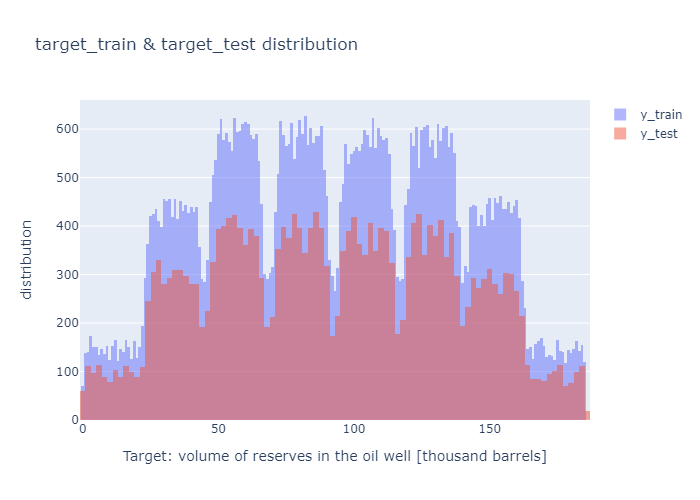

**The targets values have similar distribution**

##### 2.12 geo2 feature scaling:

In [21]:

x2 = geo2.drop(['id', 'product'], axis=1)
y2 = geo2['product']

x2_train, x2_test, y2_train, y2_test = split_df(x2, y2)

print('x2_train:', len(x2_train))
print('x2_test:', len(x2_test))
print('y2_train:', len(y2_train))
print('y2_test:', len(y2_test))

x2_train: 75000
x2_test: 25000
y2_train: 75000
y2_test: 25000


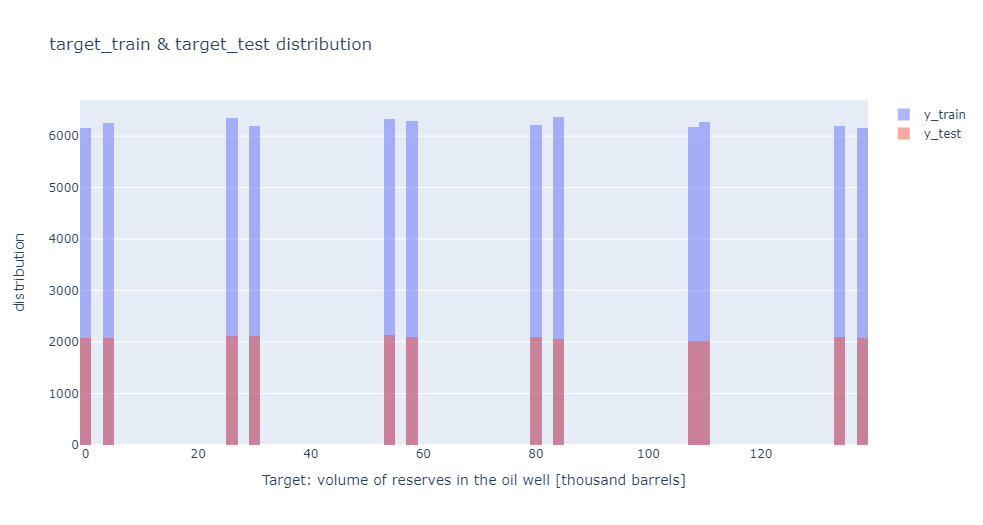

**The targets values have similar distribution**

##### 2.13 geo3 feature scaling:

In [22]:

x3 = geo3.drop(['id', 'product'], axis=1)
y3 = geo3['product']

x3_train, x3_test, y3_train, y3_test = split_df(x3, y3)

print('x3_train:', len(x3_train))
print('x3_test:', len(x3_test))
print('y3_train:', len(y3_train))
print('y3_test:', len(y3_test))

x3_train: 75000
x3_test: 25000
y3_train: 75000
y3_test: 25000


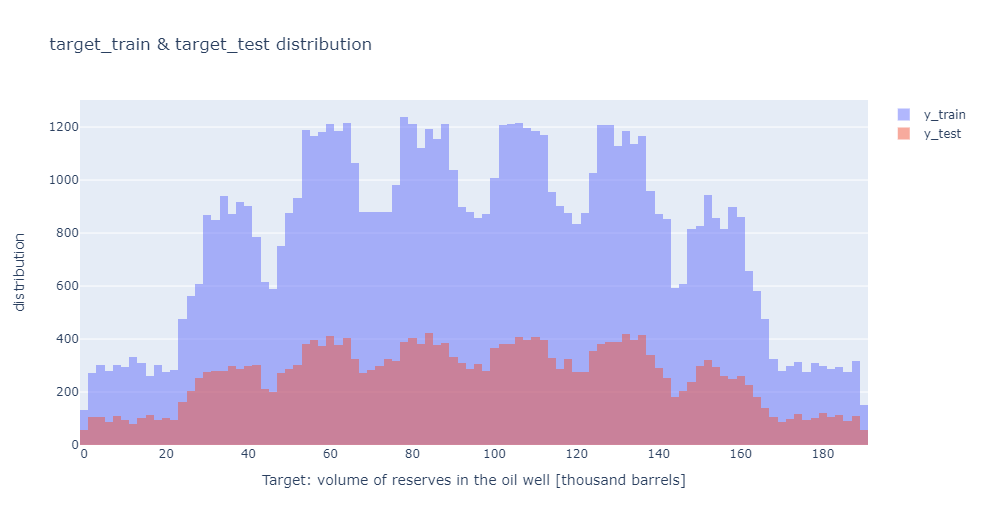

**The targets values have similar distribution**

#### 2.2 Train the model and make predictions for the validation set





* Only linear regression is suitable for model training (the rest are not sufficiently predictable).
* we are going to:
    * train the models, 
    * predict the volume of reseves based on the different features for different region 
    * calculate the average volume of predicted reserves for different regions
    * calculate the RMSD(root-mean-square deviation)

##### 2.2.1 train model for region1:

In [27]:
model1 = LinearRegression()
model1.fit(x1_train, y1_train) # train model on training set
predictions1 = model1.predict(x1_test) # get model predictions on validation set
print('The average volume of predicted reserves on region 1: ', predictions1.mean())
print('The average given volume of reserves for region 1: ', geo1['product'].mean())
result1 = mean_squared_error(y1_test, predictions1)**0.5 # calculate RMSD
print("RMSE of the linear regression model1, for region 1:", result1)

The average volume of predicted reserves on region 1:  92.59256778438035
The average given volume of reserves for region 1:  92.49999999999974
RMSE of the linear regression model1, for region 1: 37.5794217150813


**For region 1:**
* The average volume of predicted reserves 92.6 thousand barrels
* RMSD is 37.6 which mean that ther's a possible error of 37.6 thousand barrels

##### 2.2.2 train model for region2:

In [28]:
model2 = LinearRegression()
model2.fit(x2_train, y2_train) # train model on training set
predictions2 = model2.predict(x2_test) # get model predictions on validation set
print('The average volume of predicted reserves for region 2: ', predictions2.mean())
print('The average given volume of reserves for region 2: ', geo2['product'].mean())
result2 = mean_squared_error(y2_test, predictions2)**0.5 # calculate RMSD
print("RMSE of the linear regression model2, for region 2:", result2)

The average volume of predicted reserves for region 2:  68.728546895446
The average given volume of reserves for region 2:  68.82500000002561
RMSE of the linear regression model2, for region 2: 0.8930992867756168


**For region 2:**
* The average volume of predicted reserves is 68.73 thousand barrels
* RMSD is 0.9 which mean that ther's a possible error of 0.9 thousand barrels

##### 2.2.3 train model for region3:

In [29]:
model3 = LinearRegression()
model3.fit(x3_train, y3_train) # train model on training set
predictions3 = model3.predict(x3_test) # get model predictions on validation set
print('The average volume of predicted reserves for region 3: ', predictions3.mean())
print('The average given volume of reserves for region 3: ', geo3['product'].mean())
result3 = mean_squared_error(y3_test, predictions3)**0.5 # calculate RMSD
print("RMSE of the linear regression model3, for region 3:", result3)

The average volume of predicted reserves for region 3:  94.96504596800489
The average given volume of reserves for region 3:  95.00000000000041
RMSE of the linear regression model3, for region 3: 40.02970873393434


**For region 3:**
* The average volume of predicted reserves 95 thousand barrels
* RMSD is 40 which mean that ther's a possible error of 40 thousand barrels

#### 2.3 Analyze the results

In [23]:
# fig = go.Figure()

# fig.add_trace(go.Violin(name = 'region 1',
#                         y =  predictions1,
#                         box_visible=True,
#                         meanline_visible=True))

# fig.add_trace(go.Violin(name = 'region 2',
#                         y =  predictions2,
#                         box_visible=True,
#                         meanline_visible=True))

# fig.add_trace(go.Violin(name = 'region 3',
#                         y = predictions3,
#                         box_visible=True,
#                         meanline_visible=True))
# fig.update_layout(title_text="Predictions by region distribution")
# fig.show()

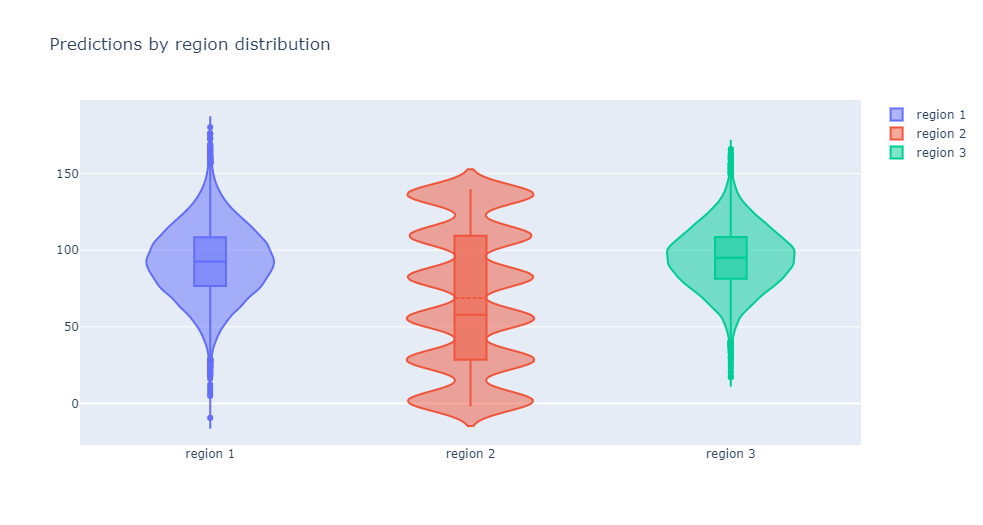

By the graphs above it clear to see:

   * The predictions on region 2 are inconsistent and have the lowest RSM fromthr three regions.
   * Regions 1 and 3  have almost the same distributions:
       * For region 1:
            * The average volume of predicted reserves 92.6 thousand barrels inconsistent
            * RMSD is 37.6 which mean that ther's a possible error of 37.6 thousand barrels
        * For region 3:
            * The average volume of predicted reserves 95 thousand barrels
            * RMSD is 40 which mean that ther's a possible error of 40 thousand barrels

### 3. Prepare for profit calculation:    

Key values for calculations: 
   * The budget for development of 200 oil wells is 100 USD million.
   * One barrel of raw materials brings 4.5 USD of revenue
   * The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

In [30]:
# Key values for profit calculations: 
budget_200 = 100 * 10 ** 6
budget_1 = budget_200/200
revenue_raw = 4.5
volume_of_reserves = 1000
unit_revenue = revenue_raw * volume_of_reserves
# The volume of reserves sufficient for developing a new well without losses: 
round(budget_1 / unit_revenue)

111

**Comparison between the obtained value with the average volume of reserves in each region:**

   * Product value **need** to be greater then **111** thousand barrels in order to developing a new well without losses.
   * **For region 1:** The average volume of predicted reserves **92.6** thousand barrels
   * **For region 2:** The average volume of predicted reserves **68.73** thousand barrels
   * **For region 3:** The average volume of predicted reserves **95** thousand barrels

### 4.  Profit estimation: 

* Define function who calculate and return the top 200 wells of set of selected oil wells and model predictions,
* Summarize the target volume of reserves in accordance with these predictions,
* Provide findings and calculate the profit for the obtained volume of reserves.

In [31]:
predictions1 = pd.Series(predictions1)
predictions2 = pd.Series(predictions2)
predictions3 = pd.Series(predictions3)
y1_test = pd.Series(y1_test).reset_index(drop = True)
y2_test = pd.Series(y2_test).reset_index(drop = True)
y3_test = pd.Series(y3_test).reset_index(drop = True)

reg1 = pd.concat([y1_test, predictions1], axis=1, join="inner")
reg1.columns = ['target', 'pred']

reg2 = pd.concat([y2_test, predictions2], axis=1, join="inner")
reg2.columns = ['target', 'pred']

reg3 = pd.concat([y3_test, predictions3], axis=1, join="inner")
reg3.columns = ['target', 'pred']

In [32]:
print('region 1 length: ', len(reg1))
print('region 2 length: ', len(reg2))
print('region 3 length: ', len(reg3))

region 1 length:  25000
region 2 length:  25000
region 3 length:  25000


In [33]:
def calc_profit(region):
    BUDGET_200 = 100 * (10 ** 6)
    BUDGET_1 = BUDGET_200/200
    RAW_REVENUE = 4.5
    VOLUME_OF_RESERVE = 1000
    UNIT_REVENUE = RAW_REVENUE * VOLUME_OF_RESERVE
    
    
    reg_rel = region.sort_values(by ='pred', ascending = False).head(200)
    top_200_volumes = reg_rel['target']
    top_200_revenues = (reg_rel['target']*UNIT_REVENUE)-BUDGET_1
    sum_top_200 = sum(top_200_revenues)
       
    return  top_200_volumes, sum_top_200 
    

In [34]:
sample1 = reg1.sample(n=800, replace=True, random_state=12345).reset_index(drop= True)
top_200_pred_vol_reg1, sum_top_200_pred_revenue_reg1 =  calc_profit(sample1)

sample2 = reg2.sample(n=800, replace=True, random_state=12345).reset_index(drop= True)
top_200_pred_vol_reg2, sum_top_200_pred_revenue_reg2 =  calc_profit(sample2)

sample3 = reg3.sample(n=800, replace=True, random_state=12345).reset_index(drop= True)
top_200_pred_vol_reg3, sum_top_200_pred_revenue_reg3 =  calc_profit(sample3)


In [35]:
# Provide findings and calculate the profit for the obtained volume of reserves:

print("The predicted profit from region 1 200 top wells: ", sum_top_200_pred_revenue_reg1)
print("The predicted volume from region 1 200 top wells: ", top_200_pred_vol_reg1.sum())
print()
print("The predicted profit from region 2 200 top wells: ", sum_top_200_pred_revenue_reg2)
print("The predicted volume from region 2 200 top wells: ", top_200_pred_vol_reg2.sum())
print()
print("The predicted profit from region 3 200 top wells: ", sum_top_200_pred_revenue_reg3)
print("The predicted volume from region 3 200 top wells: ", top_200_pred_vol_reg3.sum())

The predicted profit from region 1 200 top wells:  13547657.375178535
The predicted volume from region 1 200 top wells:  25232.812750039673

The predicted profit from region 2 200 top wells:  13845598.610571621
The predicted volume from region 2 200 top wells:  25299.021913460372

The predicted profit from region 3 200 top wells:  7875544.220299912
The predicted volume from region 3 200 top wells:  23972.343160066644


**Region 3 has the lowest profit for the top 200 predicted product and Region 1 has the highest volume**

### 5. Calculate risks and profit for each region

* When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
* After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. 
* From the ones that fit the criteria, the region with the highest average profit should be selected.
* The data is synthetic: contract details and well characteristics are not disclosed.
* Analyze potential profit and risks using the Bootstrapping technique.

In [36]:
def bootstrap(region, n_samples):
    state = np.random.RandomState(12345)
    values_rev =[]
    
    for i in range(n_samples):
        subsample = region.sample(n=500, replace=True, random_state=state).reset_index(drop= True)
        volume, revenue =  calc_profit(subsample)
        values_rev.append(revenue)
    
    values_rev = pd.Series(values_rev)

    return values_rev

#### 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit

In [37]:
revenue1 = bootstrap(reg1, 1000)
losses1 = revenue1[revenue1<0]

In [38]:
revenue2 = bootstrap(reg2, 1000)
losses2 = revenue2[revenue2<0]
losses2.head()

52    -1.059347e+06
172   -3.384513e+05
250   -1.922681e+06
275   -1.472354e+06
289   -1.023894e+06
dtype: float64

In [39]:
revenue3 = bootstrap(reg3, 1000)
losses3 = revenue3[revenue3<0]
losses3.head()

0    -7.189923e+05
4    -5.596049e+05
13   -2.008793e+05
19   -1.016950e+06
21   -2.466664e+06
dtype: float64

In [41]:
# fig5 = go.Figure()
# fig5.add_trace(go.Histogram(x=revenue1, name = 'region 1'))
# fig5.add_trace(go.Histogram(x=revenue2, name = 'region 2'))
# fig5.add_trace(go.Histogram(x=revenue3, name = 'region 3'))
        
# # Overlay both histograms
# fig5.update_layout(barmode='overlay')
# # Reduce opacity to see both histograms
# fig5.update_layout(yaxis_title = 'distribution',
#                     xaxis_title = 'Profit assement',
#                     title_text="Profit assement by top 200 predictions per region distribution")

# fig5.update_traces(opacity=0.50)
# fig5.show()

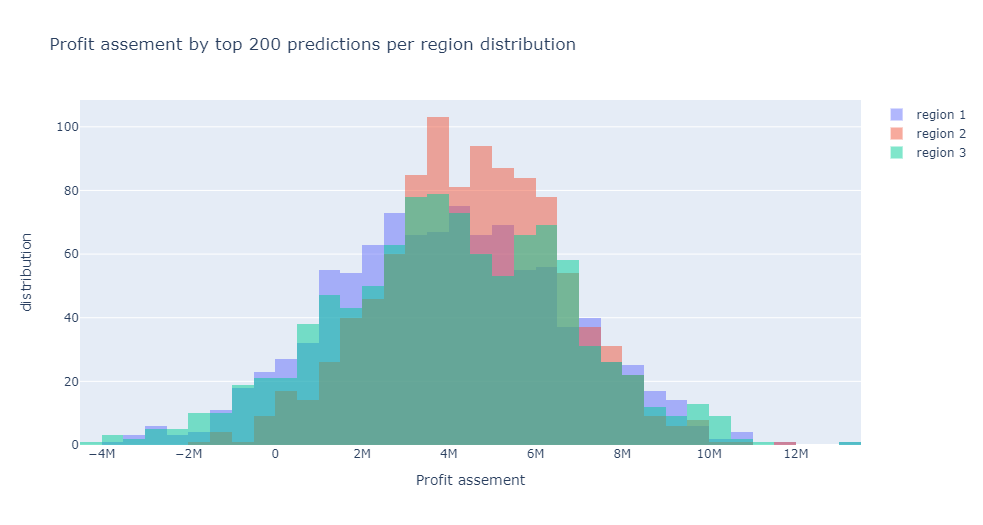

#### 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage

In [42]:
def calc_5_2(revenue, losses, region):
    print(region)
    print("The average profit: %.2f" %revenue.mean())
    print("95% confidence interval (95 present of the data between the follwing borders):")
    print("Top border: %.2f" %revenue.quantile(0.975))
    print("Bottom border: %.2f" % revenue.quantile(0.025))
    print("Risk of losses: ", len(losses)/ len(revenue))
    

In [43]:
calc_5_2(revenue1, losses1, "Region1")

Region1
The average profit: 3961649.85
95% confidence interval (95 present of the data between the follwing borders):
Top border: 9097669.42
Bottom border: -1112155.46
Risk of losses:  0.069


In [44]:
calc_5_2(revenue2, losses2, "Region2")


Region2
The average profit: 4560451.06
95% confidence interval (95 present of the data between the follwing borders):
Top border: 8522894.54
Bottom border: 338205.09
Risk of losses:  0.015


In [45]:
calc_5_2(revenue3, losses3, "Region3")

Region3
The average profit: 4044038.67
95% confidence interval (95 present of the data between the follwing borders):
Top border: 9503595.75
Bottom border: -1633504.13
Risk of losses:  0.076


**Region 2 has the best evaluation outcome:**
* The average profit: 4,560,451.06
* 95% confidence interval (95 present of the data between the follwing borders):
    * Top border: 8,522,894.54
    * Bottom border: 338,205.09
* Risk of losses:  0.015

### Conclusion

For the OilyGiant mining company. 
The task is to find the best place for a new well.
We got data on three regions oil wells, we trained the 3 different linear regression models to  predict the volume of the wells.
After the 3 models were trained, we used the test set to get predictions for the tree region. 
for the 200 best predictions the true volume were used to find the revenue for thos 200 point. 
Then we used to bootsrap technique to take 1000 samples of 500 observations, from thos 500 observations the 200 best oil wells were chosen(the true value) based on 200 best predictions. 

**Region 1:**
* The average profit: 3,961,649.85
* 95% confidence interval:
    * Top border: 9,097,669.42
    * Bottom border: -1,112,155.46
* Risk of losses:  0.069

**Region 2 :**
* The average profit: 4,560,451.06
* 95% confidence interval:
    * Top border: 8,522,894.54
    * Bottom border: 338,205.09
* Risk of losses:  0.015

**Region3: *
* The average profit: 4,044,038.67
* 95% confidence interval:
    * Top border: 9,503,595.75
    * Bottom border: -1,633,504.13
* Risk of losses:  0.076

Region 2 has the best evaluation outcome, the lowest risk and the highest average profit, and that the reason I suggest Region 2 for development of oil wells.